In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Manual Scoring Data:
   Unnamed: 0     nose_x     nose_y  nose_p  left_ear_x  left_ear_y  \
0           0  322.00000  158.00000     0.0   314.00000   187.00000   
1           1  322.00000  158.00000     0.0   314.00000   188.00000   
2           2  323.00000  158.00000     0.0   316.00000   187.00000   
3           3  323.00000  157.00000     0.0   315.00000   187.00000   
4           4  322.36365  157.43224     0.0   314.64493   187.39383   

   left_ear_p  right_ear_x  right_ear_y  right_ear_p  ...  \
0    0.000000    345.00000    177.00000          1.0  ...   
1    0.000000    345.00000    178.00000          1.0  ...   
2    0.000000    345.00000    178.00000          1.0  ...   
3    0.000000    345.00000    177.00000          1.0  ...   
4    0.123615    345.10535    177.22176          1.0  ...   

   Sum_All_bp_movements_Animal_1_mean_15  Sum_probabilities  \
0                              448.65405           1.000000   
1                              450.52230           1.000000

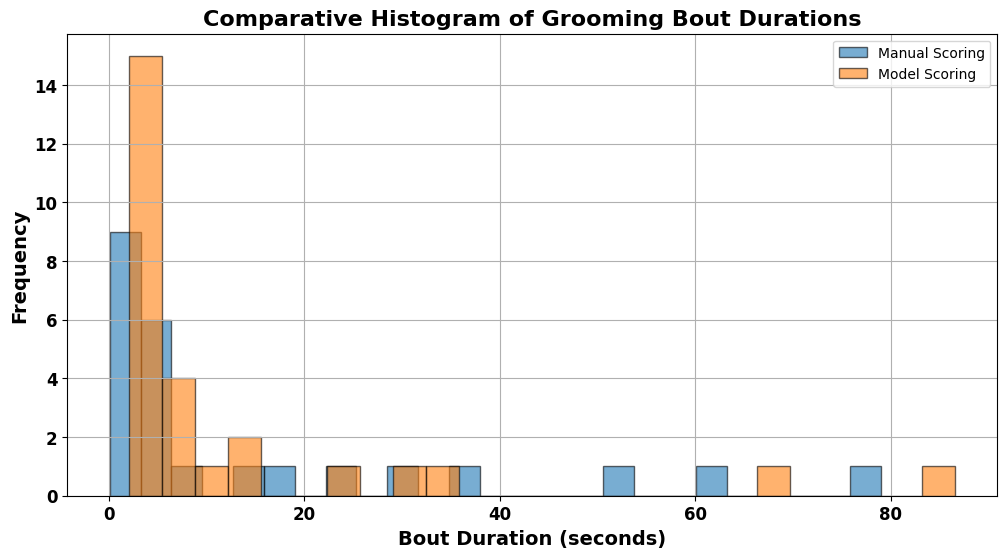

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparative_grooming_bout_durations(manual_file_path, model_file_path, frame_rate=30.09):
    """
    Function to plot comparative histograms of grooming bout durations for manual and model scoring,
    and display tables showing the bout durations.

    Parameters:
    manual_file_path: path to the CSV file containing manual grooming data.
    model_file_path: path to the CSV file containing model grooming data.
    frame_rate: frame rate of the video (default is 30.09).
    """
    # Load the CSV files into DataFrames
    manual_df = pd.read_csv(manual_file_path)
    model_df = pd.read_csv(model_file_path)

    # Display the first few rows of each DataFrame to understand their structure
    print("Manual Scoring Data:")
    print(manual_df.head())
    print("\nModel Scoring Data:")
    print(model_df.head())

    # Define a function to extract bout durations from a DataFrame
    def extract_bout_durations(df):
        # Identify grooming bouts
        df['bout_id'] = (df['grooming'] != df['grooming'].shift()).cumsum()
        # Filter out non-grooming bouts
        grooming_bouts = df[df['grooming'] == 1]
        # Calculate the duration of each grooming bout in frames
        bout_durations_frames = grooming_bouts.groupby('bout_id').size()
        # Convert frame durations to seconds using the frame rate
        return bout_durations_frames / frame_rate

    # Extract bout durations for manual and model scores
    manual_bout_durations = extract_bout_durations(manual_df)
    model_bout_durations = extract_bout_durations(model_df)

    # Create DataFrames for bout durations
    manual_durations_df = manual_bout_durations.reset_index(name='Duration (seconds)')
    manual_durations_df['Source'] = 'Manual Scoring'

    model_durations_df = model_bout_durations.reset_index(name='Duration (seconds)')
    model_durations_df['Source'] = 'Model Scoring'

    # Combine the DataFrames for display
    combined_durations_df = pd.concat([manual_durations_df, model_durations_df], ignore_index=True)

    # Print the tables
    print("\nGrooming Bout Durations:")
    print(combined_durations_df)

        # Plot histograms for both manual and model scoring
    plt.figure(figsize=(12, 6))
    plt.hist(manual_bout_durations, bins=25, alpha=0.6, label='Manual Scoring', edgecolor='black')
    plt.hist(model_bout_durations, bins=25, alpha=0.6, label='Model Scoring', edgecolor='black')

    # Customizing labels and title with bold font
    plt.xlabel('Bout Duration (seconds)', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.title('Comparative Histogram of Grooming Bout Durations', fontsize=16, fontweight='bold')

    # Customizing tick labels with bold font
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    # Add legend and grid
    plt.legend()
    plt.grid(True)

    # Save the figure
    plt.savefig('/content/drive/MyDrive/results/comparative_histogram.png', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

# Example usage:
plot_comparative_grooming_bout_durations('/content/drive/MyDrive/comparison--scoring/581885_f42_wt_2023-03-08-151135-0000.csv', '/content/drive/MyDrive/comparison--scoring/581885_f42_wt_2023-03-08-151135-0000-m.csv')


Manual Scoring Data:
   Unnamed: 0     nose_x     nose_y  nose_p  left_ear_x  left_ear_y  \
0           0  322.00000  158.00000     0.0   314.00000   187.00000   
1           1  322.00000  158.00000     0.0   314.00000   188.00000   
2           2  323.00000  158.00000     0.0   316.00000   187.00000   
3           3  323.00000  157.00000     0.0   315.00000   187.00000   
4           4  322.36365  157.43224     0.0   314.64493   187.39383   

   left_ear_p  right_ear_x  right_ear_y  right_ear_p  ...  \
0    0.000000    345.00000    177.00000          1.0  ...   
1    0.000000    345.00000    178.00000          1.0  ...   
2    0.000000    345.00000    178.00000          1.0  ...   
3    0.000000    345.00000    177.00000          1.0  ...   
4    0.123615    345.10535    177.22176          1.0  ...   

   Sum_All_bp_movements_Animal_1_mean_15  Sum_probabilities  \
0                              448.65405           1.000000   
1                              450.52230           1.000000

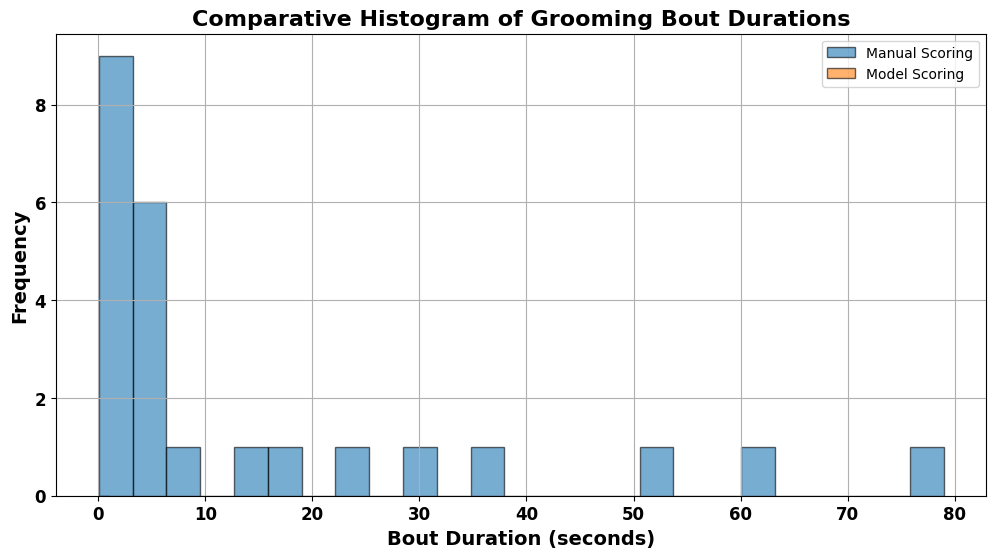

In [ ]:
plot_comparative_grooming_bout_durations('/content/drive/MyDrive/comparison--scoring/581885_f42_wt_2023-03-08-151135-0000.csv', '/content/drive/MyDrive/results/581885_f42_wt_2023-03-08-151135-0000.csv')

In [ ]:
import pandas as pd

def count_bouts_in_ranges(durations, bins):
    """
    Count the number of bouts in each specified duration range.

    Parameters:
    durations: Series of bout durations.
    bins: List of bin edges.

    Returns:
    DataFrame with counts of bouts in each bin.
    """
    # Define bin edges as intervals
    intervals = pd.IntervalIndex.from_breaks(bins)

    # Bin the durations into these intervals
    binned_durations = pd.cut(durations, bins=intervals, include_lowest=True)

    # Count the number of bouts in each bin
    bout_counts = binned_durations.value_counts().reindex(intervals).fillna(0).astype(int)

    # Create a DataFrame for the results
    return bout_counts.reset_index(name='Number of Bouts')

def get_bout_counts(manual_file_path, model_file_path, frame_rate=30.09):
    """
    Function to count the number of grooming bouts in specified duration ranges for manual and model scoring.

    Parameters:
    manual_file_path: path to the CSV file containing manual grooming data.
    model_file_path: path to the CSV file containing model grooming data.
    frame_rate: frame rate of the video (default is 30.09).

    Returns:
    DataFrame with counts of bouts in each range for both manual and model scoring.
    """
    # Load the CSV files into DataFrames
    manual_df = pd.read_csv(manual_file_path)
    model_df = pd.read_csv(model_file_path)

    # Define a function to extract bout durations from a DataFrame
    def extract_bout_durations(df):
        # Identify grooming bouts
        df['bout_id'] = (df['grooming'] != df['grooming'].shift()).cumsum()
        # Filter out non-grooming bouts
        grooming_bouts = df[df['grooming'] == 1]
        # Calculate the duration of each grooming bout in frames
        bout_durations_frames = grooming_bouts.groupby('bout_id').size()
        # Convert frame durations to seconds using the frame rate
        return bout_durations_frames / frame_rate

    # Extract bout durations for manual and model scores
    manual_bout_durations = extract_bout_durations(manual_df)
    model_bout_durations = extract_bout_durations(model_df)

    # Define duration ranges (bins)
    duration_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

    # Count the number of bouts in each duration range
    manual_bouts_counts = count_bouts_in_ranges(manual_bout_durations, duration_bins)
    manual_bouts_counts['Source'] = 'Manual Scoring'
    model_bouts_counts = count_bouts_in_ranges(model_bout_durations, duration_bins)
    model_bouts_counts['Source'] = 'Model Scoring'

    # Combine the DataFrames for display
    combined_bouts_counts = pd.concat([manual_bouts_counts, model_bouts_counts], ignore_index=True)
    combined_bouts_counts.columns = ['Time Range', 'Number of Bouts', 'Source']

    # Print the table
    print("\nGrooming Bouts per Duration Range:")
    print(combined_bouts_counts.pivot(index='Time Range', columns='Source', values='Number of Bouts'))

# Example usage:
get_bout_counts('/content/drive/MyDrive/comparison--scoring/581885_f42_wt_2023-03-08-151135-0000.csv', '/content/drive/MyDrive/comparison--scoring/581885_f42_wt_2023-03-08-151135-0000-m.csv')



Grooming Bouts per Duration Range:
Source      Manual Scoring  Model Scoring
Time Range                               
(0, 5]                  12             14
(5, 10]                  4              6
(10, 15]                 0              1
(15, 20]                 2              1
(20, 25]                 1              1
(25, 30]                 0              0
(30, 35]                 1              2
(35, 40]                 1              0
(40, 45]                 0              0
(45, 50]                 0              0
(50, 55]                 1              0
(55, 60]                 0              0
(60, 65]                 1              0
(65, 70]                 0              1
(70, 75]                 0              0
(75, 80]                 1              0
(80, 85]                 0              0
(85, 90]                 0              1
